In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.patches as patches

In [91]:
R_bounce = 0.01
st_max = 10

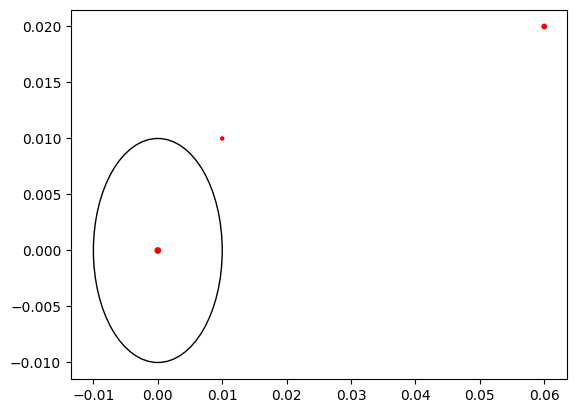

In [41]:
xp0 = 0.0
yp0 = 0.0
xp1 = 0.01
yp1 = 0.01
xp2 = 0.06
yp2 = 0.02
plt.scatter([xp0, xp1, xp2], [yp0, yp1, yp2], c='r', s=[15,5,10])
plt.gca().add_patch(patches.Circle((xp0, yp0), R_bounce, fill=False))

too far away no collision
energy before 0.0079 and after 0.0079, 
 linear momentum before (0.1471, 0.1147) and after (0.1471, 0.1147)


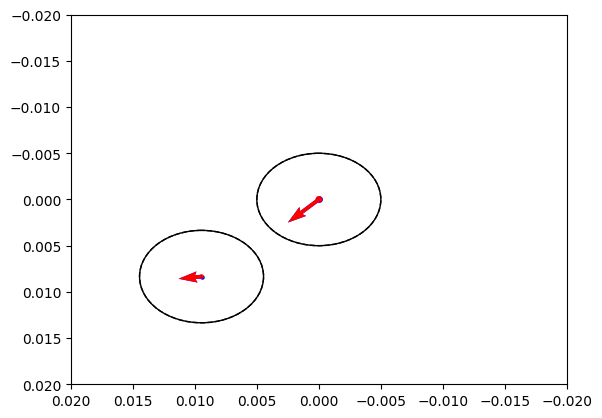

In [183]:
xp1 = np.random.uniform(-0.01, 0.01)
yp1 = np.random.uniform(-0.01, 0.01)
vx1 = np.random.uniform(-0.01, 0.01)
vy1 = np.random.uniform(-0.01, 0.01)


df = np.array([[0, xp0, yp0, 0.01, 0.01, 11], [1, xp1, yp1, vx1, vy1, 5]]) #, [2, xp2, yp2, 0, 0, 4]])
bubble_row = df[0].copy()
neighbor_rows = df

kd_tree = sp.spatial.KDTree(df[:, 1:3])
min_dist, min_idx = kd_tree.query(bubble_row[1:3], k=[2]) 
partner_ID = neighbor_rows[min_idx[0], 0]

partner_row = df[min_idx[0]].copy()

# collision but not coalescence -- bounce
# perfect elastic collision assumption
if min_dist <= R_bounce and (bubble_row[5] > st_max or partner_row[5] > st_max):
# if bubble_row[5] > st_max or partner_row[5] > st_max:
    delta_r = - bubble_row[1:3] + partner_row[1:3]
    delta_v = - bubble_row[3:5] + partner_row[3:5]
    d = np.inner(delta_r, delta_v) ** 2 - np.inner(delta_v, delta_v) * (np.inner(delta_r, delta_r) - R_bounce ** 2)
    
    if d < 0 or np.inner(delta_r, delta_v) >= 0:
        print('no collision')
    
    else:
        
        J = 2 * (bubble_row[5] ** 1.5)* (partner_row[5] ** 1.5) * np.inner(delta_r, delta_v) / (R_bounce * (bubble_row[5] ** 1.5 + partner_row[5] ** 1.5))
        bubble_row[3:5] = bubble_row[3:5] + J * (delta_r / R_bounce) / (bubble_row[5] ** 1.5)
        partner_row[3:5] = partner_row[3:5] - J * (delta_r / R_bounce) / (partner_row[5] ** 1.5)

        # for simplicity will now use i to denote bubble and j for partner
        dx_partner = np.abs(delta_r[0]) * (R_bounce/np.linalg.norm(delta_r) -1) / (1 + np.abs(bubble_row[3]/np.abs(partner_row[3]))) * np.sign(delta_r[0])
        dy_partner =  np.abs(delta_r[1]) * (R_bounce/np.linalg.norm(delta_r) -1) / (1 + np.abs(bubble_row[4]/np.abs(partner_row[4])))* np.sign(delta_r[1])
        dx_bubble = np.abs(dx_partner) * np.abs(bubble_row[3]/partner_row[3]) * np.sign(-delta_r[0])
        dy_bubble = np.abs(dy_partner) * np.abs(bubble_row[4]/partner_row[4]) * np.sign(-delta_r[1])

        # update post-bounce positions
        bubble_row[1:3] = bubble_row[1:3] + np.array([dx_bubble, dy_bubble])
        partner_row[1:3] = partner_row[1:3] + np.array([dx_partner, dy_partner])
        print('bouncing, the original distance is {}, the new distance {:.2f}'.format(min_dist[0], np.linalg.norm(bubble_row[1:3] - partner_row[1:3])))

else:
    print('too far away no collision')

old_energy = bubble_row[5]**1.5*(0.01**2+0.01**2) + partner_row[5]**1.5*(vx1**2+vy1**2)
new_energy = bubble_row[5]**1.5*(bubble_row[3]**2+bubble_row[4]**2) + partner_row[5]**1.5*(partner_row[3]**2+partner_row[4]**2)
old_momentum_x = bubble_row[5]*0.01 + partner_row[5]*vx1
new_momentum_x = bubble_row[5]*bubble_row[3] + partner_row[5]*partner_row[3]
old_momentum_y = bubble_row[5]*0.01 + partner_row[5]*vy1
new_momentum_y = bubble_row[5]*bubble_row[4] + partner_row[5]*partner_row[4]
print('energy before {:.4f} and after {:.4f}, \n linear momentum before ({:.4f}, {:.4f}) and after ({:.4f}, {:.4f})'.
      format(old_energy, new_energy, old_momentum_x, old_momentum_y, new_momentum_x, new_momentum_y))

plt.scatter(partner_row[1], partner_row[2], c='b', s=5)
plt.scatter(bubble_row[1], bubble_row[2], c='b', s=15)
plt.scatter(df[:, 1], df[:, 2], c='r', s=[15,5])
plt.quiver(bubble_row[1], bubble_row[2], bubble_row[3], bubble_row[4], color='b', angles='xy', scale_units='xy', scale=4)
plt.quiver(partner_row[1], partner_row[2], partner_row[3], partner_row[4], color='b', angles='xy', scale_units='xy', scale=4)
plt.quiver(xp0, yp0, 0.01, 0.01, color='r', angles='xy', scale_units='xy', scale=4)
plt.quiver(xp1, yp1, vx1, vy1, color='r', angles='xy', scale_units='xy', scale=4)
plt.gca().add_patch(patches.Circle((bubble_row[1], bubble_row[2]), R_bounce/2, fill=False))
plt.gca().add_patch(patches.Circle((partner_row[1], partner_row[2]), R_bounce/2, fill=False))
plt.gca().add_patch(patches.Circle((xp0, yp0), R_bounce/2, fill=False,  linestyle='--'))
plt.gca().add_patch(patches.Circle((xp1, yp1), R_bounce/2, fill=False, linestyle='--'))
plt.xlim(2*R_bounce, -2*R_bounce)
plt.ylim(2*R_bounce, -2*R_bounce);


In [87]:
np.inner(delta_r, delta_v) 

-1.2045441126371404e-05